# Import Dataset

In [9]:
import pandas as pd
import json

# 1. Load and Explore the Excel File
def load_excel(file_path):
    """Load an Excel file and display its contents."""
    print(f"Loading Excel file: {file_path}")
    try:
        data = pd.read_excel(file_path)
        print("Excel File Preview:")
        print(data.head())
        return data
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

# 2. Load and Explore COCO JSON Files
def load_coco_json(file_path):
    """Load a COCO JSON file and display its structure."""
    print(f"\nLoading COCO JSON file: {file_path}")
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print("COCO JSON Keys:")
        print(list(data.keys()))
        print("Example data (annotations):")
        if "annotations" in data:
            print(data["annotations"][:2])  # Show a preview of annotations
        return data
    except Exception as e:
        print(f"Error loading JSON file: {e}")
        return None

# 3. Paths to Dataset Files
excel_file = "CarDD_release/CarDD_COCO/annotations/image_info.xlsx"  # Update with the correct path if necessaryy
coco_train_json = "CarDD_release/CarDD_COCO/annotations/instances_train2017.json"
coco_val_json = "CarDD_release/CarDD_COCO/annotations/instances_val2017.json"
coco_test_json = "CarDD_release/CarDD_COCO/annotations/instances_test2017.json"

# 4. Run the Functions to Explore the Dataset
# Uncomment the following lines if files are in the same directory
excel_data = load_excel(excel_file)
train_data = load_coco_json(coco_train_json)
val_data = load_coco_json(coco_val_json)
test_data = load_coco_json(coco_test_json)

# 5. Example of Inspecting Data
# Check number of images and annotations in the train set
if train_data:
    num_images = len(train_data.get("images", []))
    num_annotations = len(train_data.get("annotations", []))
    print(f"\nTraining Dataset: {num_images} images, {num_annotations} annotations")

Loading Excel file: CarDD_release/CarDD_COCO/annotations/image_info.xlsx
Excel File Preview:
   id   file_name  width  height  file_size (KB)  #instances  #categories  \
0   1  000001.jpg   1000     750            1114           2            2   
1   2  000002.jpg   1000     667             637           1            1   
2   3  000003.jpg   1000     667             966           1            1   
3   4  000004.jpg   1000     667             806           1            1   
4   5  000005.jpg   1000     667             959           1            1   

  shooting angle complete or partial   color  
0           side              partial    red  
1           side              partial  white  
2           side              partial  white  
3           side              partial   gray  
4           side              partial   gray  

Loading COCO JSON file: CarDD_release/CarDD_COCO/annotations/instances_train2017.json
COCO JSON Keys:
['licenses', 'info', 'categories', 'images', 'annotations']

# Generating Multi-Label Vector

In [10]:
from collections import defaultdict
import pandas as pd

# Step 6: Generate Multi-Label Vectors
def generate_multi_label_vectors(data, num_categories):
    """Generate multi-label vectors for images based on COCO annotations."""
    print("\nGenerating multi-label vectors for images...")

    # Map image_id to its category_ids
    image_to_categories = defaultdict(set)
    for ann in data["annotations"]:
        image_to_categories[ann["image_id"]].add(ann["category_id"])

    # Create multi-label vectors
    image_multi_labels = []
    for image_id, categories_present in image_to_categories.items():
        # Format image_id to match filenames like '000001.jpg'
        formatted_image_id = f"{image_id:06d}.jpg"  # Add leading zeros and .jpg extension
        multi_label_vector = [0] * num_categories  # Initialize all labels to 0
        for category in categories_present:
            multi_label_vector[category - 1] = 1  # Assuming category IDs are 1-indexed
        image_multi_labels.append({"image_id": formatted_image_id, "multi_label_vector": multi_label_vector})

    # Convert to a DataFrame for easy exploration
    df = pd.DataFrame(image_multi_labels)
    return df

def process_dataset(data, split_name, num_categories):
    """Process a dataset and save multi-label vectors for a specific split."""
    print(f"\nProcessing {split_name} dataset...")
    if data:
        # Generate the multi-label vectors
        multi_label_df = generate_multi_label_vectors(data, num_categories)
        
        # Display the first few rows
        print(f"\n{split_name.capitalize()} Multi-Label DataFrame Preview:")
        print(multi_label_df.head())
        
        # Save the multi-label vectors to a CSV file
        output_file = f"multi_label_vectors_{split_name}.csv"
        multi_label_df.to_csv(output_file, index=False)
        print(f"\nMulti-label vectors for {split_name} saved to '{output_file}'")

# Step 7: Process Train, Validation, and Test Datasets
if train_data:
    # Get the number of categories from the train dataset (categories are consistent across splits)
    categories = train_data.get("categories", [])
    num_categories = len(categories)
    print(f"\nNumber of categories: {num_categories}")

    # Process train, validation, and test datasets
    process_dataset(train_data, "train", num_categories)
    process_dataset(val_data, "val", num_categories)
    process_dataset(test_data, "test", num_categories)


Number of categories: 6

Processing train dataset...

Generating multi-label vectors for images...

Train Multi-Label DataFrame Preview:
     image_id  multi_label_vector
0  000001.jpg  [0, 1, 0, 0, 0, 1]
1  000002.jpg  [0, 0, 0, 0, 0, 1]
2  000003.jpg  [0, 0, 0, 0, 0, 1]
3  000004.jpg  [0, 0, 0, 0, 0, 1]
4  000005.jpg  [0, 0, 0, 0, 0, 1]

Multi-label vectors for train saved to 'multi_label_vectors_train.csv'

Processing val dataset...

Generating multi-label vectors for images...

Val Multi-Label DataFrame Preview:
     image_id  multi_label_vector
0  000013.jpg  [0, 0, 1, 1, 0, 1]
1  000016.jpg  [1, 1, 0, 0, 0, 0]
2  000017.jpg  [0, 1, 0, 0, 0, 0]
3  000024.jpg  [0, 1, 0, 0, 0, 0]
4  000025.jpg  [0, 1, 0, 0, 0, 0]

Multi-label vectors for val saved to 'multi_label_vectors_val.csv'

Processing test dataset...

Generating multi-label vectors for images...

Test Multi-Label DataFrame Preview:
     image_id  multi_label_vector
0  000012.jpg  [0, 0, 0, 0, 0, 1]
1  000015.jpg  [0, 1, 0, 0

# Updated Dataset Structure With Class Labels

In [11]:
from PIL import Image
import os
import pandas as pd
import torch

class CarDDDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, image_dir, class_label_mapping, transform=None):
        """
        Args:
            csv_file (str): Path to the CSV file containing image paths and labels.
            image_dir (str): Directory where images are stored.
            class_label_mapping (dict): Mapping of label numbers to class descriptions.
            transform (callable, optional): Optional transform to apply to images.
        """
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.class_label_mapping = class_label_mapping
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the image file path and labels
        image_id = self.data.iloc[idx]['image_id']
        image_path = os.path.join(self.image_dir, image_id)  # Construct full image path
        multi_label_vector = eval(self.data.iloc[idx]['multi_label_vector'])  # List of binary values

        # Load the image as a PIL object
        image = Image.open(image_path).convert("RGB")

        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)

        # Get the string class names for active labels
        active_labels = [self.class_label_mapping[i + 1] for i, val in enumerate(multi_label_vector) if val == 1]

        # Return the structured data
        return {
            "image": image,  # PIL Image or transformed tensor
            "image_file_path": image_path,
            "labels": torch.tensor(multi_label_vector, dtype=torch.float),  # Multi-label tensor
            "active_label_names": active_labels  # List of active class names
        }

# Label Mapping

The following table describes the mapping of numerical labels to their respective descriptions:

| Label Number | Description        |
|--------------|--------------------|
| 1            | Dent              |
| 2            | Scratch           |
| 3            | Crack             |
| 4            | Glass Shatter     |
| 5            | Lamp Broken       |
| 6            | Tire Flat         |

In [12]:
# Class label mapping based on your image
class_label_mapping = {
    1: "Dent",
    2: "Scratch",
    3: "Crack",
    4: "Glass Shatter",
    5: "Lamp Broken",
    6: "Tire Flat"
}

# Apply Dataset Class On All Three Dataset

In [13]:
# Define file paths for all splits
train_csv_file = "multi_label_vectors_train.csv"
val_csv_file = "multi_label_vectors_val.csv"
test_csv_file = "multi_label_vectors_test.csv"

train_image_dir = "CarDD_release/CarDD_COCO/train2017"
val_image_dir = "CarDD_release/CarDD_COCO/val2017"
test_image_dir = "CarDD_release/CarDD_COCO/test2017"

# Initialize the dataset for each split
train_dataset = CarDDDataset(train_csv_file, train_image_dir, class_label_mapping)
val_dataset = CarDDDataset(val_csv_file, val_image_dir, class_label_mapping)
test_dataset = CarDDDataset(test_csv_file, test_image_dir, class_label_mapping)

# Our Dataset

Let's take a look at the first example from train_dataset, each example has 4 feature:
1. image
2. image_file_path
3. labels
4. active_label_names

In [14]:
ex0 = train_dataset[0]
ex0

{'image': <PIL.Image.Image image mode=RGB size=1000x750>,
 'image_file_path': 'CarDD_release/CarDD_COCO/train2017/000001.jpg',
 'labels': tensor([0., 1., 0., 0., 0., 1.]),
 'active_label_names': ['Scratch', 'Tire Flat']}

Let's take a look at the image 👀

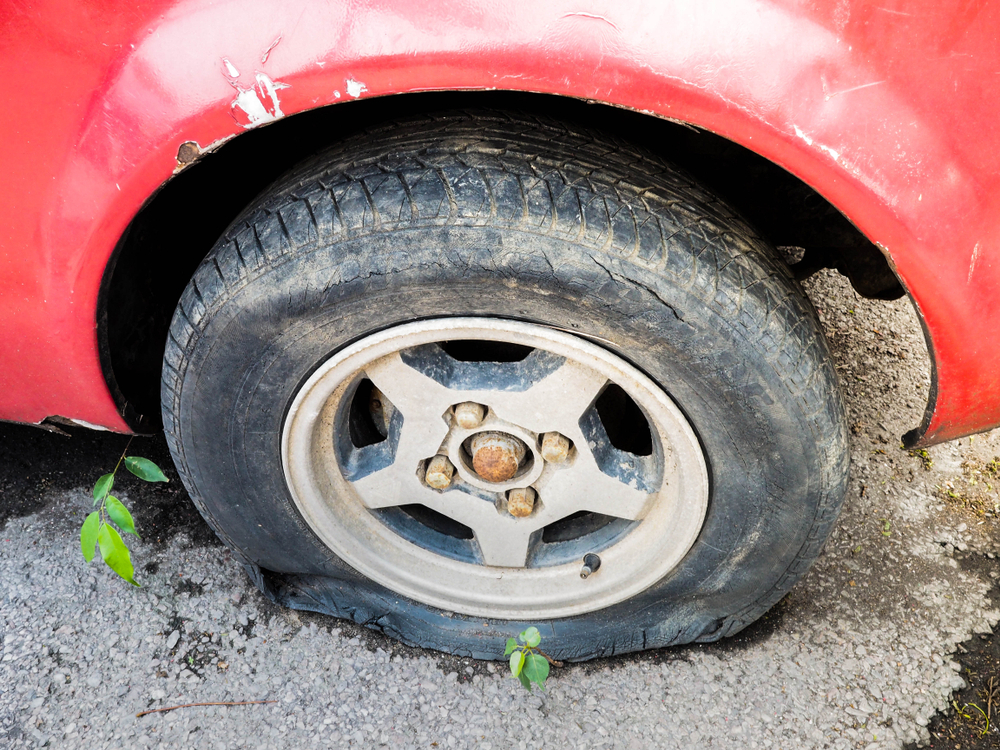

In [15]:
ex0['image']

In [16]:
import torch

# Save the datasets
torch.save(train_dataset, "train_dataset.pt")
torch.save(val_dataset, "val_dataset.pt")
torch.save(test_dataset, "test_dataset.pt")

print("Datasets saved as PyTorch files.")

Datasets saved as PyTorch files.


# EDA(We can put EDA part here, maybe some distribution plot that we can put in our report)

In [17]:
# Check the Dataset Length
print(f"Number of examples in train dataset: {len(train_dataset)}")
print(f"Number of examples in validation dataset: {len(val_dataset)}")
print(f"Number of examples in test dataset: {len(test_dataset)}")
print("")

# Inspect the first example in the train dataset    
example = train_dataset[0]
print("Keys in the dataset:", example.keys())
print("Image type:", type(example["image"]))
print("Labels type:", type(example["labels"]))
print("Active label names:", example["active_label_names"])

Number of examples in train dataset: 2816
Number of examples in validation dataset: 810
Number of examples in test dataset: 374

Keys in the dataset: dict_keys(['image', 'image_file_path', 'labels', 'active_label_names'])
Image type: <class 'PIL.Image.Image'>
Labels type: <class 'torch.Tensor'>
Active label names: ['Scratch', 'Tire Flat']
